In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [180]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [181]:
df = pd.read_csv('/content/drive/MyDrive/A/gurgaon_properties_cleaned_v2.csv')

In [182]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


<ipython-input-183-889942f5454f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

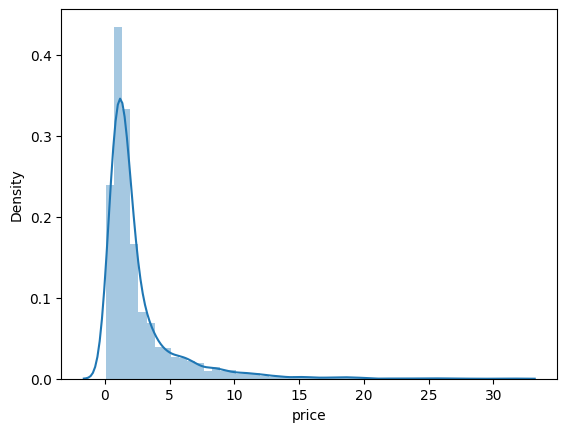

In [183]:
#  outlier on the basis of price column
sns.distplot(df['price'])

<Axes: ylabel='price'>

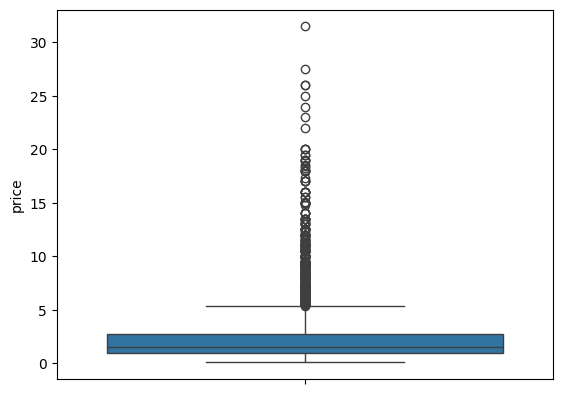

In [184]:
sns.boxplot(df['price'])

In [185]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [186]:
IQR

1.7600000000000002

In [187]:
Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

In [188]:
# identify outlier
outlier = df[(df['price'] < Lower_tail) | (df['price'] > Upper_tail)]

In [189]:
num_outlier = outlier.shape[0]
outliers_price_state = outlier['price'].describe()
num_outlier,outliers_price_state

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [190]:
outlier.sort_values('price',ascending= False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2211,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2488,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
1686,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0


In [191]:
# on the basis of price col we can say there are genuin outlier and some data errore

<ipython-input-192-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

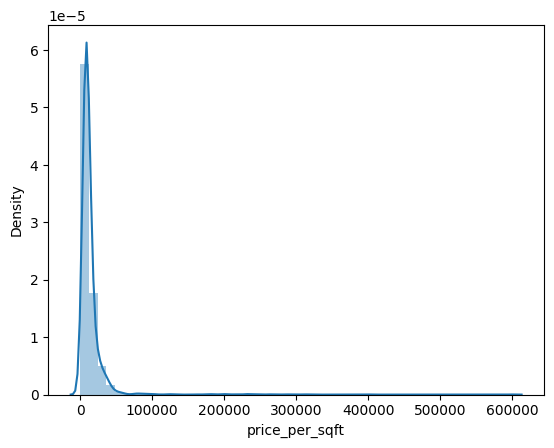

In [192]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

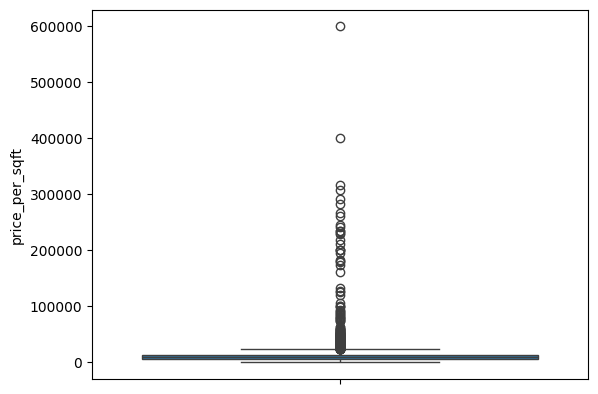

In [193]:
sns.boxplot(df['price_per_sqft'])

In [194]:
# calculate the iqr for the price_per_sqf
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

In [195]:
Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

In [196]:
outlier_price_per_sqft = df[(df['price_per_sqft'] < Lower_tail) | (df['price_per_sqft'] > Upper_tail)]

In [197]:
outlier_price_per_sqft.sort_values('price_per_sqft',ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2850,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114
2461,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
2047,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,1,49


In [198]:
outlier_price_per_sqft['area']=outlier_price_per_sqft['area'].apply(lambda x: x*9 if x<1000 else x)

<ipython-input-198-a58052463acf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_price_per_sqft['area']=outlier_price_per_sqft['area'].apply(lambda x: x*9 if x<1000 else x)


In [199]:
outlier_price_per_sqft['price_per_sqft'] = round(outlier_price_per_sqft['price']*10000000/outlier_price_per_sqft['area'])

<ipython-input-199-4d18ef47188b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_price_per_sqft['price_per_sqft'] = round(outlier_price_per_sqft['price']*10000000/outlier_price_per_sqft['area'])


In [200]:
outlier_price_per_sqft['price_per_sqft'].describe()

,price_per_sqft
count,367.000000
mean,29160.735695
std,12308.413881
min,2689.000000
25%,25051.500000
50%,29630.000000
75%,35489.000000
max,82540.000000


In [201]:
df.update(outlier_price_per_sqft)

<ipython-input-202-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

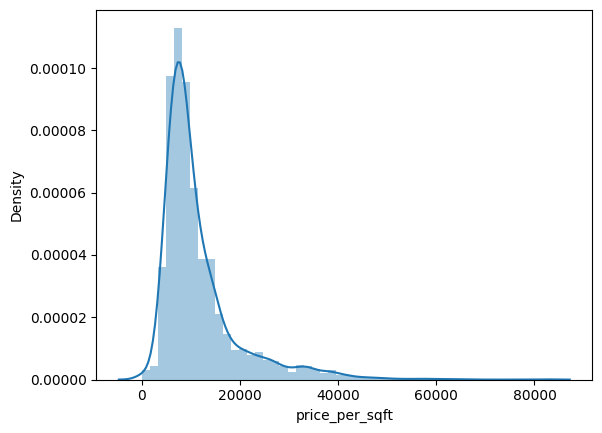

In [202]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

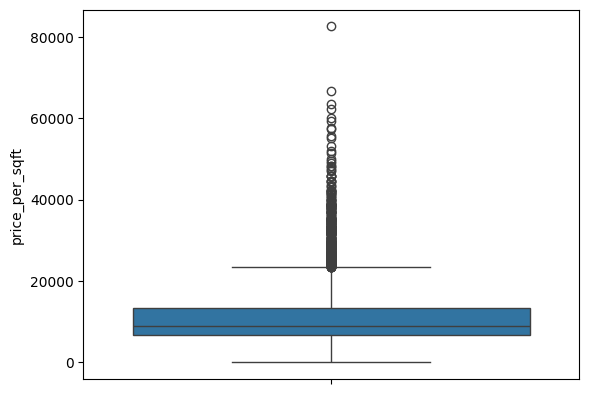

In [203]:
sns.boxplot(df['price_per_sqft'])

In [204]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
386,house,cloudnine cottages,sohna road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,1,153
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99


In [205]:
df = df[df['price_per_sqft'] <= 50000]

<ipython-input-206-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

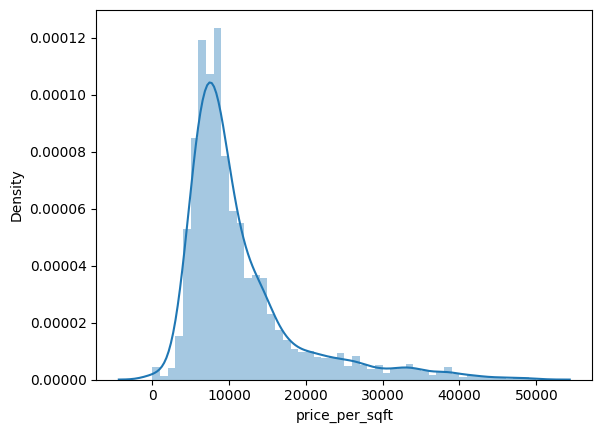

In [206]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

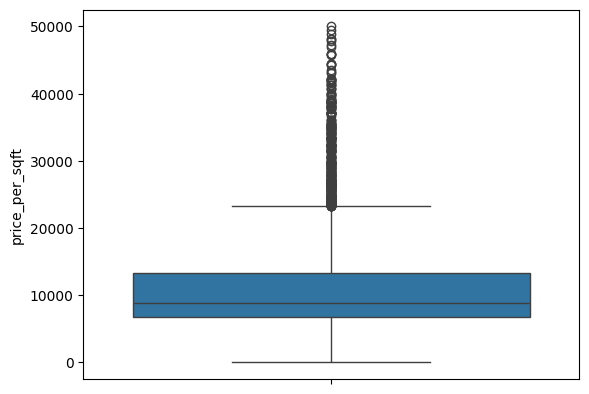

In [207]:
sns.boxplot(df['price_per_sqft'])

# AREA

<ipython-input-208-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

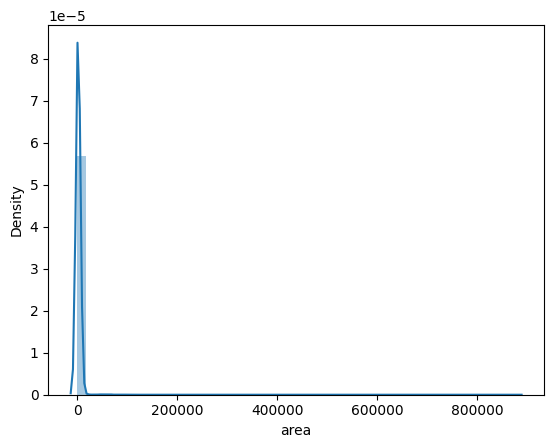

In [208]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

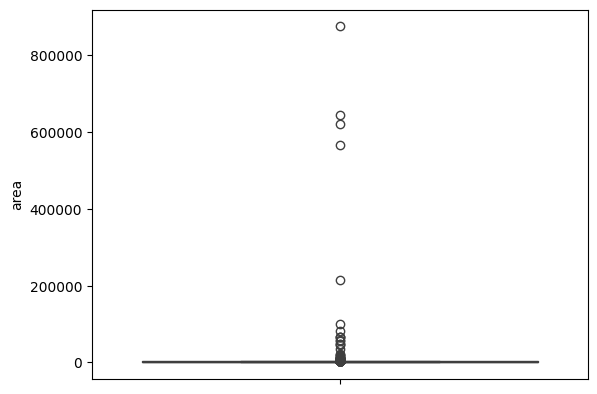

In [209]:
sns.boxplot(df['area'])

In [210]:
df['area'].describe()

,area
count,3772.00000
mean,2906.69035
std,22822.30511
min,145.00000
25%,1257.75000
50%,1745.00000
75%,2340.00000
max,875000.00000


In [211]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [212]:
df = df[df['area'] < 100000]

<ipython-input-213-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

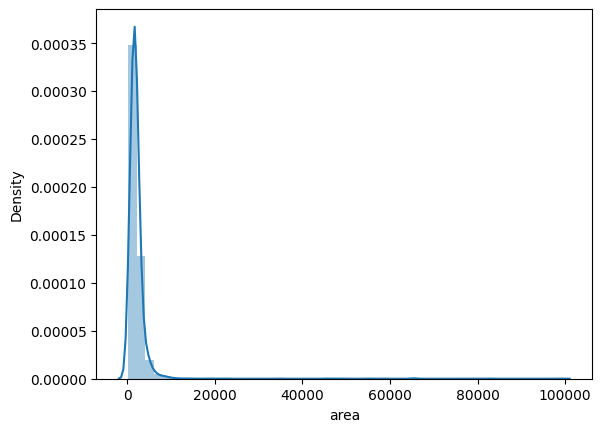

In [213]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

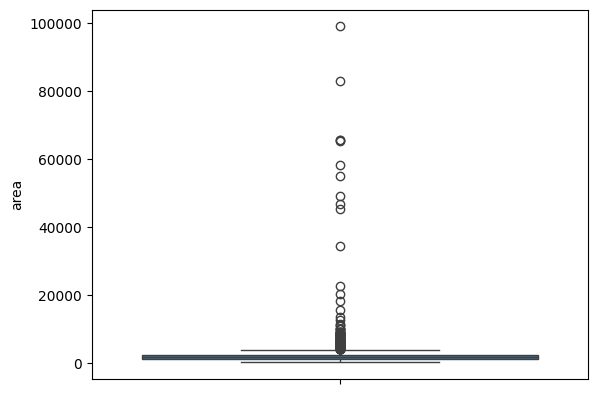

In [214]:
sns.boxplot(df['area'])

In [215]:
df[df['area'] > 100000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [216]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [217]:
df = df[df['area'] <= 10000]

<ipython-input-218-e045d1b00126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

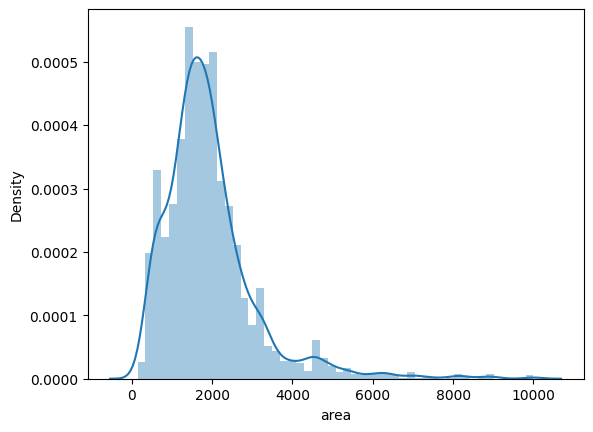

In [218]:
sns.distplot(df['area'])

<Axes: ylabel='area'>

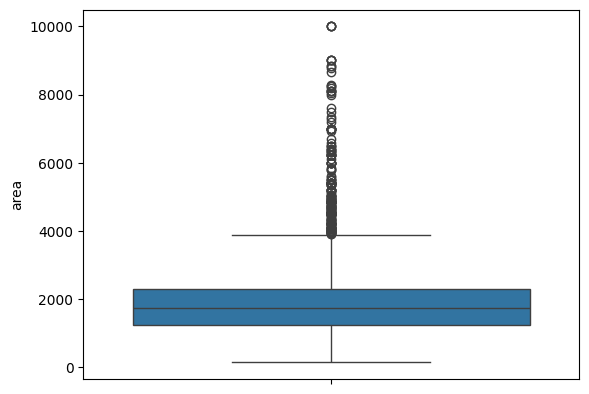

In [219]:
sns.boxplot(df['area'])

In [220]:
df['area'].describe()

,area
count,3747.000000
mean,1932.614892
std,1182.734775
min,145.000000
25%,1250.000000
50%,1741.000000
75%,2303.500000
max,10000.000000


# bedroom

<ipython-input-222-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

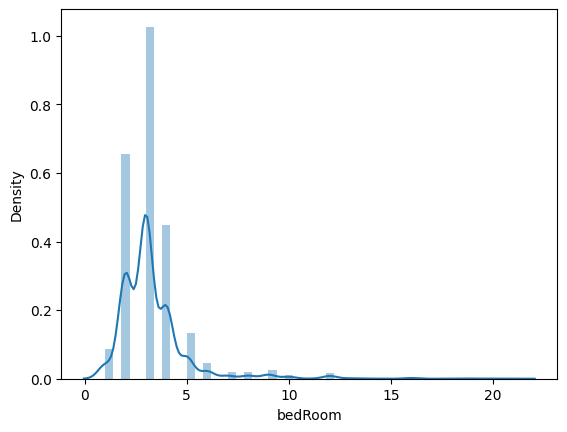

In [222]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='bedRoom'>

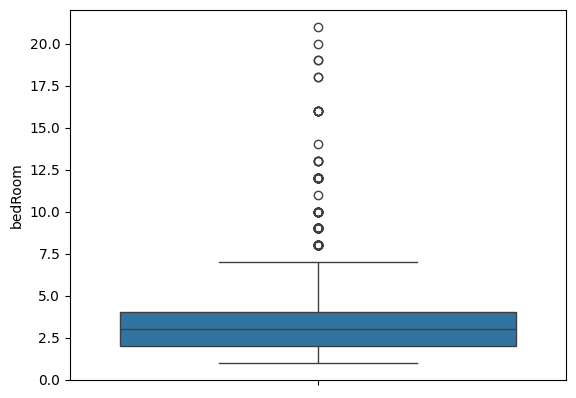

In [223]:
sns.boxplot(df['bedRoom'])

In [225]:
df['bedRoom'].describe()

,bedRoom
count,3747.000000
mean,3.303176
std,1.799151
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [226]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
2611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
78,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
1493,house,independent,sector 17,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1381,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
3457,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
2137,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
2096,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
2039,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1,1,0,1,1,0,41


In [227]:
df = df[df['bedRoom'] <= 10]

In [228]:
df.shape

(3702, 23)

<ipython-input-229-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

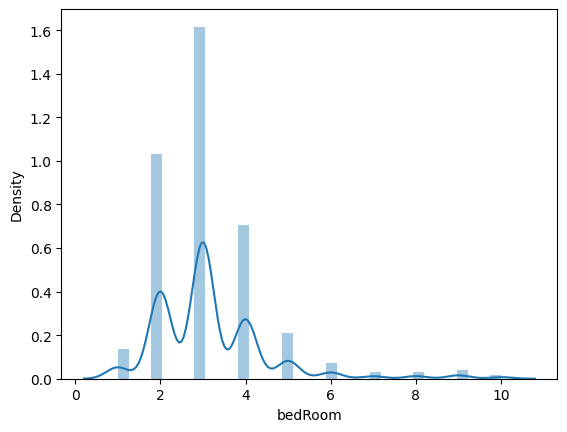

In [229]:
sns.distplot(df['bedRoom'])

<Axes: ylabel='bedRoom'>

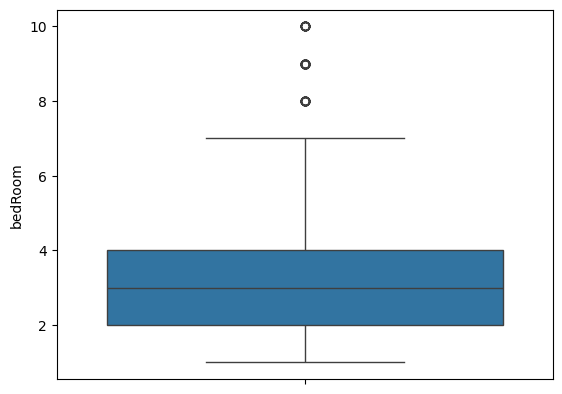

In [230]:
sns.boxplot(df['bedRoom'])

In [232]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8


# super_built_up_area

<ipython-input-234-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

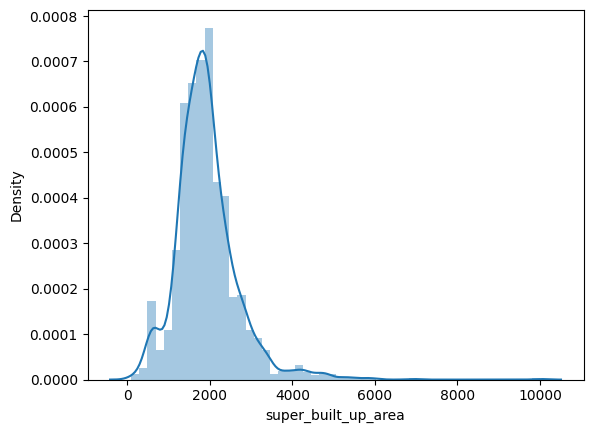

In [234]:
sns.distplot(df['super_built_up_area'])

<Axes: ylabel='super_built_up_area'>

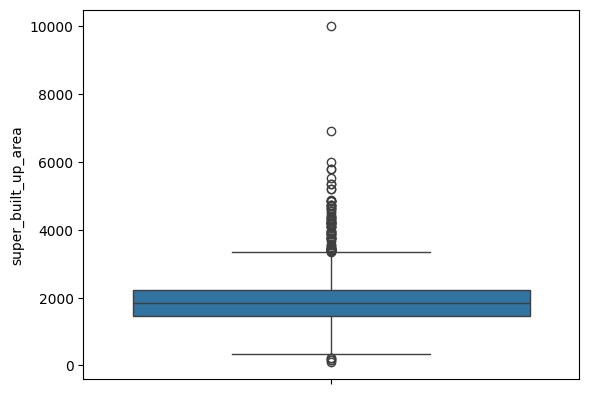

In [235]:
sns.boxplot(df['super_built_up_area'])

In [236]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1915.000000
mean,1921.658251
std,767.160169
min,89.000000
25%,1457.000000
50%,1828.000000
75%,2215.000000
max,10000.000000


In [237]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49


# built up area

<ipython-input-238-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

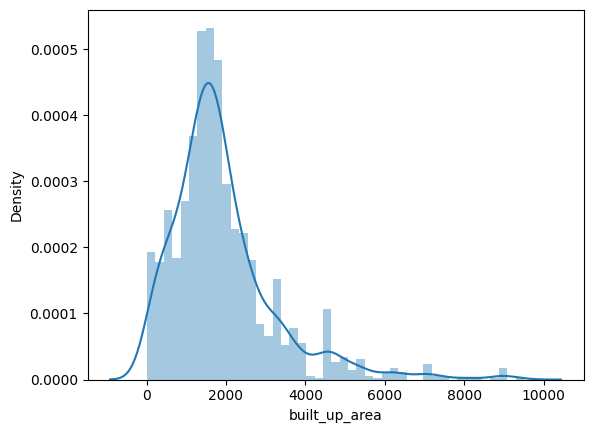

In [238]:
sns.distplot(df['built_up_area'])

<Axes: ylabel='built_up_area'>

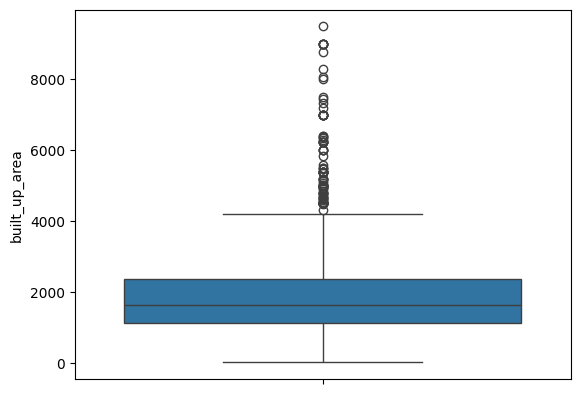

In [239]:
sns.boxplot(df['built_up_area'])

In [240]:
df['built_up_area'].describe()

,built_up_area
count,1648.000000
mean,1921.143428
std,1365.534693
min,14.000000
25%,1120.000000
50%,1646.000000
75%,2367.000000
max,9500.000000


# carpet area

<ipython-input-241-ea7bb3de9fba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

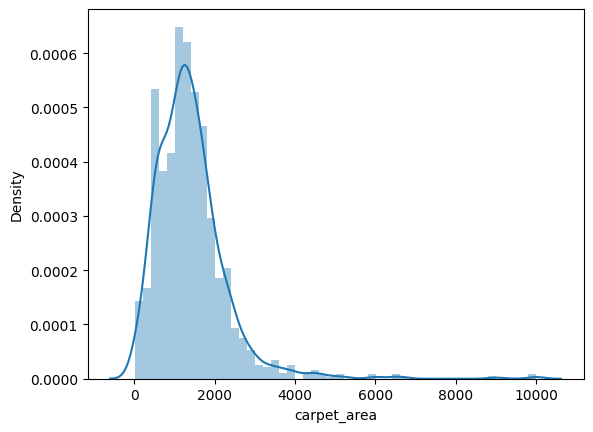

In [241]:
sns.distplot(df['carpet_area'])

<Axes: ylabel='carpet_area'>

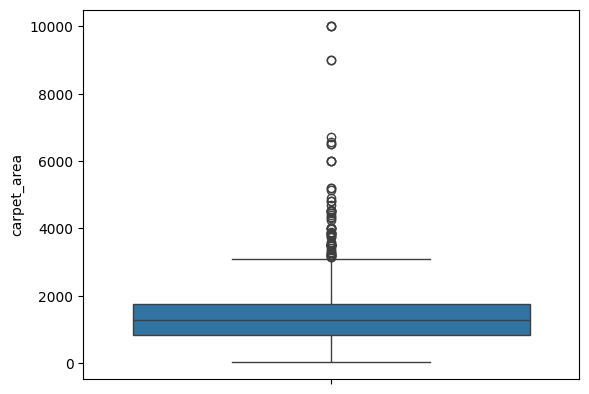

In [242]:
sns.boxplot(df['carpet_area'])

In [243]:
df['carpet_area'].describe()

,carpet_area
count,1914.000000
mean,1408.536294
std,926.010823
min,15.000000
25%,830.000000
50%,1286.000000
75%,1760.000000
max,10000.000000


In [246]:
df[df['carpet_area'] >= 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
426,house,independent,sector 26,18.25,18250.0,10000.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...,7,9,3+,4.0,East,Relatively New,NaN,NaN,10000.0,1,1,1,1,0,1,77
442,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0,1,0,0,0,0,35
1683,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3,9,2,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0


In [247]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


In [248]:
df.shape

(3702, 23)

In [250]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [251]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159


<ipython-input-252-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

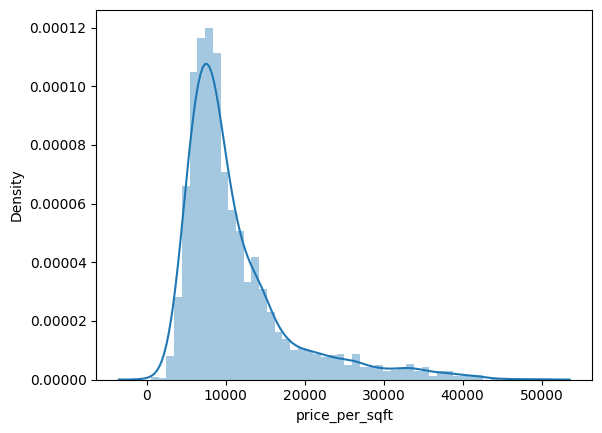

In [252]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

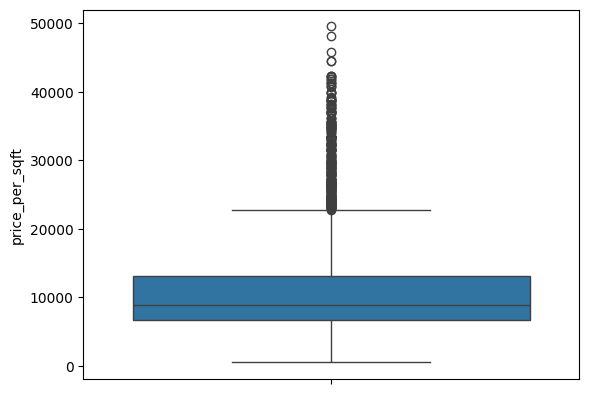

In [253]:
sns.boxplot(df['price_per_sqft'])

In [254]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
711,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
901,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60
1090,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1509,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
1526,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
2040,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
2130,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
3054,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3108,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0


In [255]:
x = df[df['price_per_sqft']<= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

257.0

In [256]:
df[df['area']/df['bedRoom'] < 250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3751,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,Undefined,NaN,NaN,535.0,0,0,0,0,0,0,0
3590,flat,signature global solera,sector 107,0.30,6135.0,489.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2,2,1,5.0,East,Relatively New,602.0,NaN,489.0,0,0,0,0,0,0,57
198,flat,central park flower valley,sector 33,1.40,21538.0,650.0,Super Built up area 650(60.39 sq.m.),3,3,3,2.0,NaN,Under Construction,650.0,NaN,NaN,0,0,0,0,0,0,54
1926,flat,ramsons kshitij,sector 95,0.40,5839.0,685.0,Carpet area: 685 (63.64 sq.m.),3,2,2,6.0,NaN,Undefined,NaN,NaN,685.0,0,0,0,0,0,0,0
1167,house,independent,sector 13,0.90,11465.0,785.0,Plot area 785(72.93 sq.m.),5,4,3,3.0,North-West,Moderately Old,NaN,785.0,NaN,1,1,0,1,1,0,0


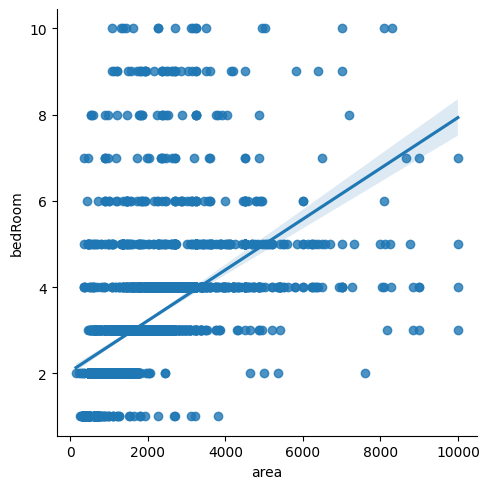

In [258]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [259]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [260]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

,count
bedRoom,
2,48
3,35
5,28
6,17
4,17
9,15
8,12
7,8
10,7


In [261]:
df = df[df['area_room_ratio'] > 100]

In [262]:
outlier_df = df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [263]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

<ipython-input-263-332d2ddec8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])


In [264]:
df.update(outlier_df)

In [265]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [266]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
387,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
753,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1106,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1206,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1747,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1936,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1939,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2806,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
3148,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000


In [267]:
df = df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

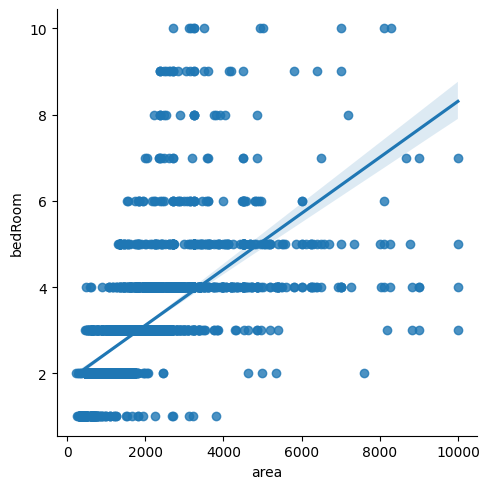

In [268]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [269]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)